# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

from xgboost.sklearn import XGBRegressor

from matplotlib import pyplot as plt

from ipynb.fs.full.Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from ipynb.fs.full.Self_Written_Functions_Sheet import rmse

In [2]:
hp_linear_fullyimputed = pd.read_csv('../hp_linear_fullyimputed.csv')

hp_linear_fullyimputed

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_

In [3]:
hp_logsaleprice = pd.read_csv('../hp_logsaleprice.csv')

hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


# *Multiple Linear Regression*

In [7]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed, hp_logsaleprice, test_size=0.2, random_state=13)

ytrain = ytrain.values.flatten()

n_folds = ms.KFold(n_splits=5, random_state=13, shuffle=True)

Wall time: 4.35 s
##################################################


Currently, the best parameters are:  {'fit_intercept': True, 'normalize': False}
##################################################


The best score is:  0.9531316261543922
##################################################


The RMSE is:  0.0861243547304487
##################################################


The test set RMSE is:  0.23491832811738286


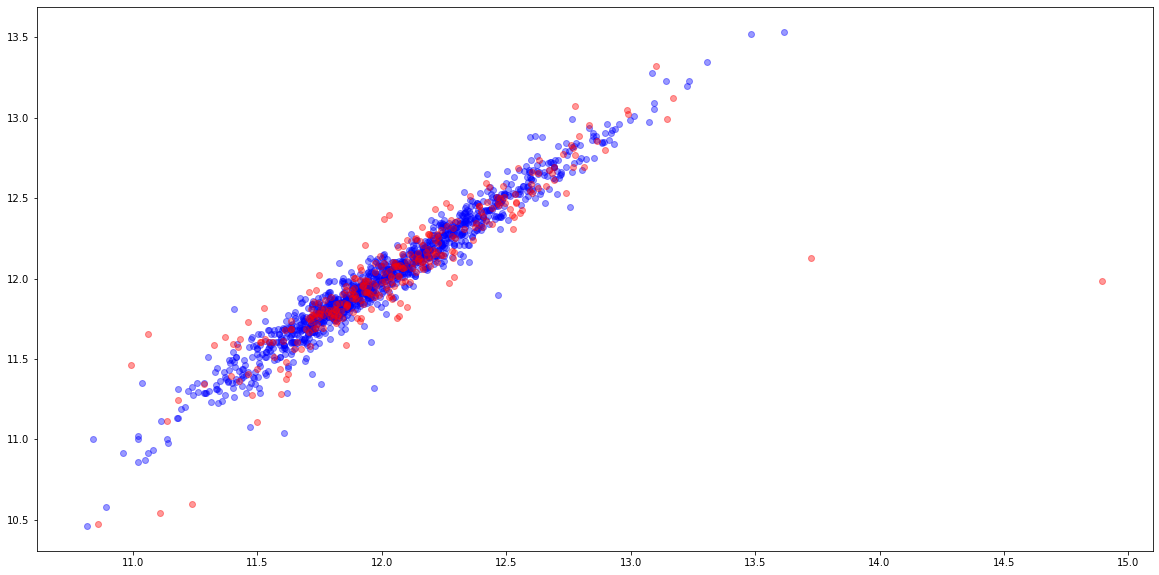

In [8]:
lm = LinearRegression()

fitintercept = [True, False]
norm = [True, False]

gparam_mlr = {'fit_intercept': fitintercept,
              'normalize': norm}

gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_mlr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_mlr.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_mlr, ytrain, xtrain))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_mlr, ytest, xtest))

plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)

- We can see that there is a huge gap between the RMSEs (which may have to do with outliers)
- We will use Lasso Regression instead

# *Penalized Linear Regressions*

Wall time: 2min 19s
##################################################


Currently, the best parameters are:  {'alpha': 1e-08}
where the alpha is:  1e-08
##################################################


The best score is:  0.9531316117285463
##################################################


The RMSE is:  0.08612436798476567


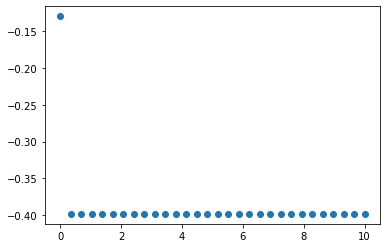

In [9]:
lasso = Lasso(random_state=13, max_iter=1000000, normalize=True)

alphas = np.linspace(1e-8, 1e1, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain, xtrain))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

Wall time: 2min 1s
##################################################


Currently, the best parameters are:  {'alpha': 0.00010345724137931036}
where the alpha is:  0.00010345724137931036
##################################################


The best score is:  0.9390240799758941
##################################################


The RMSE is:  0.09823476696929924


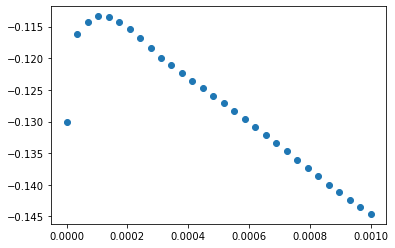

In [10]:
alphas = np.linspace(1e-8, 1e-3, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain, xtrain))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

The test set RMSE is:  0.23503544933614723


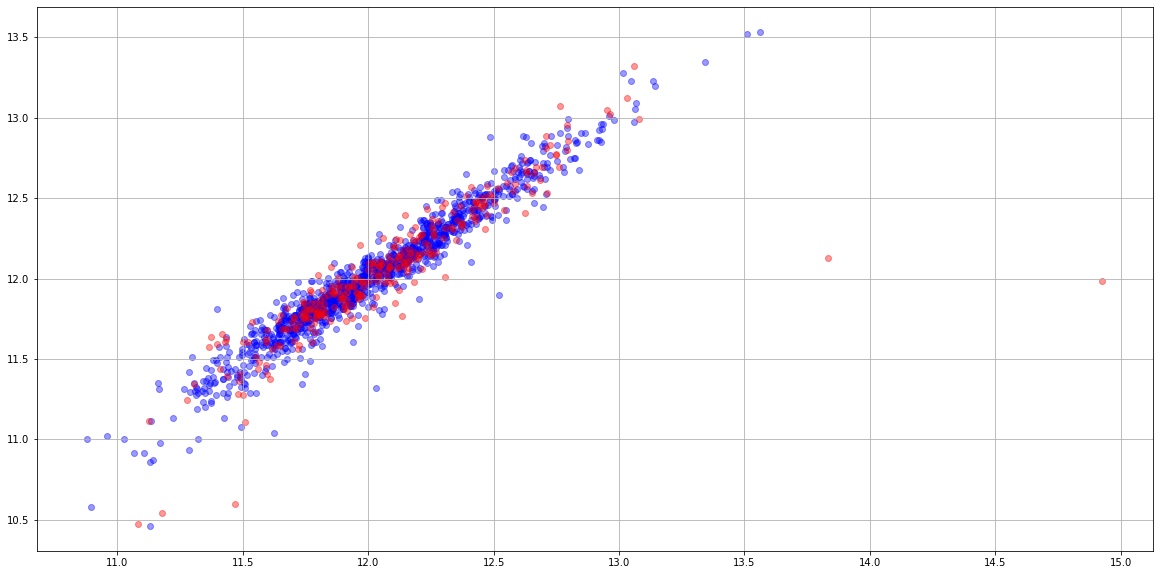

In [11]:
print('The test set RMSE is: ', rmse(gs_lasso, ytest, xtest))

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- We see that the outliers still have a big impact on the RMSE

### Select more important features

In [12]:
lasso = Lasso(alpha=gs_lasso.best_params_['alpha'], random_state=13, max_iter=1000000, normalize=True)

lasso.fit(xtrain, ytrain)

lasso_coef = pd.Series(lasso.coef_)

lasso_coef_index = [i for i, x in enumerate(lasso_coef) if abs(x) > 0]

hp_linear_selected = hp_linear_fullyimputed.iloc[:,lasso_coef_index]

hp_linear_selected

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,GarageYrModified,MSSubClass,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,BldgType_Twnhs,HouseStyle_2.5Fin,RoofMatl_Metal,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtCond_Fa,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Typ,FireplaceQu_Gd,GarageType_Attchd,GarageType_Basment,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageCond_Ex,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,SaleType_CWD,SaleType_New,SaleCondition_Normal,MSSubClass_30,MSSubClass_70,MSSubClass_160,LotFrontage
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.513191,0.575425,-0.459303,-0.120242,0.370333,1.107810,0.789741,1.227585,-0.211454,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.087688,0.138777,1.050994,60,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,-0.229372
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.571873,1.171992,0.466465,-0.120242,-0.482512,-0.819964,0.789741,-0.761621,-0.211454,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.087688,-0.614439,0.156734,20,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.451936
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.324966,0.092907,-0.313369,-0.120242,0.515013,1.107810,0.789741,1.227585,-0.211454,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688,0.138777,0.984752,60,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,-0.093110
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.571873,-0.499274,-0.687324,-0.120242,0.383659,1.107810,-1.026041,-0.761621,-0.211454,0.600495,0.285002,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.087688,-1.367655,-1.863632,70,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,-0.456474
4,0.375148,1.374795,-0.517200,0.951632,0.733308,1.365741,0.463568,0.199680,-0.120242,1.299326,1.107810,0.789741,1.227585,-0.211454,0.600495,0.289412,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.087688,0.138777,0.951632,60,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.633618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.571873,-0.973018,

### Determining Outliers

#### Outlier on right side

In [13]:
# Create dataframe of xtest predictions
df_xtest = pd.DataFrame(gs_lasso.predict(xtest))
df_xtest.rename(columns={0:'SalePrice'}, inplace=True)

# Determine the highest value of the xtest predictions
plug_in = df_xtest[df_xtest['SalePrice']==gs_lasso.predict(xtest).max()]

# Plug that value into ytest to get the 'name' (which is actually the index) of the value 
ytest.iloc[plug_in.index]

,SalePrice
1298,11.982929


## The above was also an outlier in ML_HousingPrice_EDA_and_Basic_Imputation GrLivArea Exploration

#### Outlier on Left Side

In [14]:
# Creates list of indices that are within the specified bounds of ytest
ytest_ind = list(ytest[(ytest['SalePrice']>12.75) & (ytest['SalePrice']<13)]['SalePrice'].index)

# check for the indices around where our target may lie on the x axis
df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]

# Creates list of indices that are within the specified bounds of df_xtest
xtest_ind = list(df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]['SalePrice'].index)

# Creates list of indices that are within the specified bounds of ytest using xtest_ind
comparison_list = list(ytest.iloc[xtest_ind]['SalePrice'].index)
set(ytest_ind) & set(comparison_list)

set()

### In ML_HousingPrice_EDA_and_Basic_Imputation, we saw that 523 was also an outlier

## Delete the outliers in the features and labels

In [15]:
# hp_tree_fullyimputed_noOutliers = hp_tree_fullyimputed.drop([523, 825, 1298])

hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

# Run Multiple Linear Regression without outliers

In [16]:
lm = LinearRegression()

fitintercept = [True, False]
norm = [True, False]

gparam_mlr = {'fit_intercept': fitintercept,
              'normalize': norm}

gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_mlr.best_params_)

# print('where the alpha is: ', gs_mlr.best_params_['alpha'])
# print('and the L1 ratio is: ', gs_mlr.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_mlr.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_mlr, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_mlr, ytest_sel, xtest_sel))

plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

NameError: name 'xtrain_sel' is not defined

##################################################




AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Re-run Lasso

In [ ]:
xtrain_out, xtest_out, ytrain_out, ytest_out = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=13)

ytrain_out = ytrain_out.values.flatten()

lasso = Lasso(random_state=13, max_iter=1000000, normalize=True)

n_folds = ms.KFold(n_splits=5, random_state=13, shuffle=True)

In [ ]:
alphas = np.linspace(1e-8, 0.0004, 30)

gparam_lasso_tree = [{'alpha': alphas}]

gs_lasso_tree = GridSearchCV(lasso,
                             gparam_lasso_tree, 
                             cv=n_folds,
                             scoring='neg_root_mean_squared_error',
                             return_train_score=True)

%time gs_lasso_tree.fit(xtrain_out, ytrain_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso_tree.best_params_)

print('where the alpha is: ', gs_lasso_tree.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso_tree.best_estimator_.score(xtrain_out, ytrain_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso_tree, ytrain_out, xtrain_out))

In [ ]:
plt.scatter(gs_lasso_tree.cv_results_['param_alpha'], gs_lasso_tree.cv_results_['mean_test_score'])
plt.xticks(rotation=45, ha='right')

In [ ]:
print('The test set RMSE is: ', rmse(gs_lasso_tree, ytest_out, xtest_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtrain_out), ytrain_out, color='blue', alpha=0.4)
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtest_out), ytest_out, color='red', alpha=0.4)

## Run using selected columns

In [ ]:
xtrain_sel, xtest_sel, ytrain_sel, ytest_sel = ms.train_test_split(hp_linear_selected_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=13)

ytrain_sel = ytrain_sel.values.flatten()

lasso = Lasso(random_state=13, max_iter=1000000, normalize=True)

n_folds = ms.KFold(n_splits=5, random_state=13, shuffle=True)

In [ ]:
alphas = np.linspace(1e-8, 1e-4, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_lasso, ytest_sel, xtest_sel))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

# Run Multi Linear Regression

# Run Elastic Net

In [ ]:
enet = ElasticNet(random_state=13, max_iter=10000, normalize=True)

alphas = np.logspace(-8, -2, 20)
rhos = np.logspace(-8, 1, 20)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])


plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

In [ ]:
plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])

In [ ]:
print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

In [ ]:
enet = ElasticNet(random_state=13, max_iter=10000)

alphas = np.logspace(-3, -1, 30)
rhos = np.logspace(-3, -1, 30)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

In [ ]:
# These graphs do not show us much, but they are fun to see :]

plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])